# Music Genre Prediction

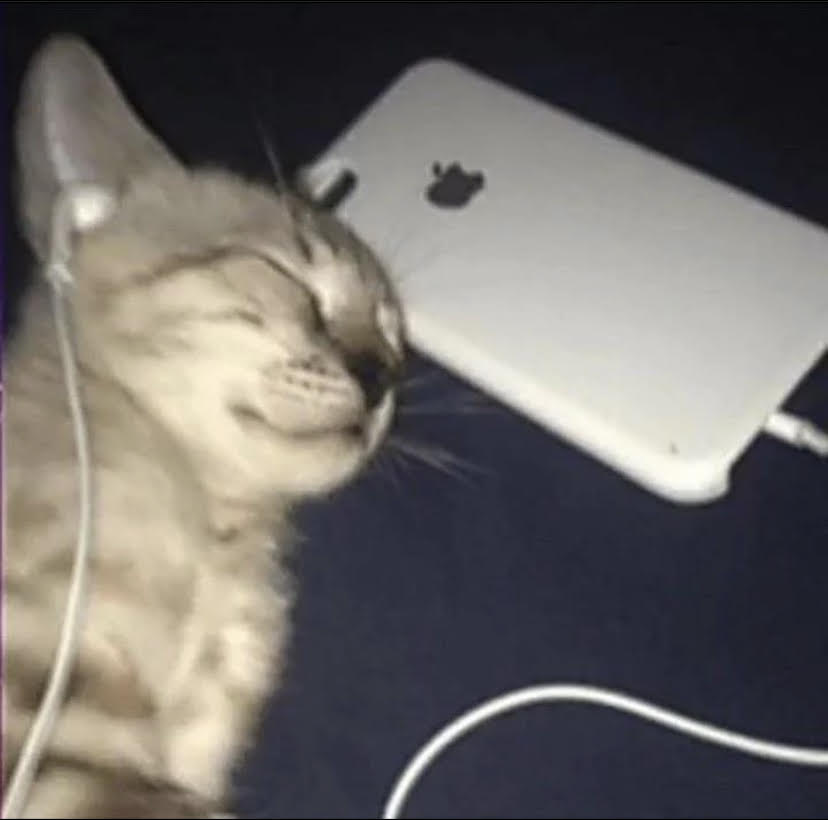

## Importanto as bibliotecas

In [2]:
import pandas as pd
import numpy as np

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Lendo os dados

In [102]:
df = pd.read_csv('/content/music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Teste 1 - Sem tratamento nenhum

Vamos fazer um teste mandando os dados sem limpeza nenhuma para um algoritmo e ver o resultado

In [103]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [104]:
X = df[['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']]
y=df['music_genre']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

ValueError: could not convert string to float: 'B'

Deu erro em uma das variáveis de entrada que demos para o KNN. Portanto precisamos tratar as variáveis de entrada

## Teste 2 - Fazendo Encoding

In [106]:
df.rename(columns={'mode':'tom'},inplace=True)

In [107]:
from sklearn.preprocessing import LabelEncoder


In [108]:
# Ajustando os gêneros musicais para número
le = LabelEncoder()
df['target'] = le.fit_transform(df['music_genre'])

In [109]:
df['target'].unique()

array([ 5,  1, 10,  7,  0,  4,  8,  2,  9,  3,  6])

In [110]:
key_dummies = pd.get_dummies(df['key'], prefix='key',dtype=int)
df = pd.concat([df.drop('key', axis=1), key_dummies], axis=1)


In [111]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'tom', 'speechiness',
       'tempo', 'obtained_date', 'valence', 'music_genre', 'target', 'key_A',
       'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#'],
      dtype='object')

In [112]:
X = df[['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness',  'liveness', 'loudness', 'tom',
       'speechiness', 'tempo', 'valence','key_A',
       'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#']]
y=df['target']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [114]:
le = LabelEncoder()
X_train['tom'] = le.fit_transform(X_train['tom'])

In [115]:
X_test['tom'] = le.transform(X_test['tom'])

Tentando novamente executar o modelo

In [116]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

ValueError: could not convert string to float: '?'

Novamente deu um erro e dessa vez sabemos que é na coluna tempo que está no formato errado

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  tom               50000 non-null  object 
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  obtained_date     50000 non-null  object 
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-null  object

In [118]:
df.tempo = df.tempo.replace({'?':np.nan})

In [119]:
df.tempo = df.tempo.astype(float)

In [120]:
X = df[['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness',  'liveness', 'loudness', 'tom',
       'speechiness', 'tempo', 'valence','key_A',
       'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#']]
y=df['target']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [122]:
le = LabelEncoder()
X_train['tom'] = le.fit_transform(X_train['tom'])

In [123]:
X_test['tom'] = le.transform(X_test['tom'])

In [124]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Como vocês podem ver os algoritmos "pedem" alguns ajustes, portanto algumas limpezas e processamento são necessários (a gente querendo ou não).

Vamos fazer uma ultima tentativa só que dessa vez removendo os valores faltantes.

## Teste 3 - Encoding + Limpeza dos Nulos

In [134]:
df_cp = df.dropna()

In [135]:
df_cp.rename(columns={'mode':'tom'},inplace=True)

<ipython-input-135-cffa2522dfe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp.rename(columns={'mode':'tom'},inplace=True)


In [136]:
X = df_cp[['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness',  'liveness', 'loudness', 'tom',
       'speechiness', 'tempo', 'valence','key_A',
       'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#']]
y=df_cp['target']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [138]:
le = LabelEncoder()
X_train['tom'] = le.fit_transform(X_train['tom'])

In [139]:
X_test['tom'] = le.transform(X_test['tom'])

In [140]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.13      0.28      0.17      1349
           1       0.24      0.30      0.27      1349
           2       0.14      0.15      0.15      1341
           3       0.33      0.29      0.31      1350
           4       0.17      0.16      0.17      1346
           5       0.17      0.14      0.16      1340
           6       0.15      0.12      0.13      1356
           7       0.16      0.11      0.13      1356
           8       0.14      0.10      0.11      1351
           9       0.17      0.10      0.13      1368

    accuracy                           0.18     13506
   macro avg       0.18      0.18      0.17     13506
weighted avg       0.18      0.18      0.17     13506



Só tratando as variáveis categóricas tivemos uma acurácia de 18%, ou seja conseguimos acertar 18% dos casos

## Aplicando corretamente as etapas de pré-processamento ✅

Agora vamos aplicar as etapas que aprendemos na aula e ver se temos alguma diferença:
- Removendo os valores faltantes
- Tratando os tipos de variáveis
- Tratando duplicados
- Removendo os outliers
- Normalizando os dados

In [141]:
df_cp = df.dropna()

In [142]:
df_cp_tratado = df_cp.drop_duplicates(subset=['artist_name', 'track_name'], keep='first')

In [143]:
# Cálculo dos quartis
def removendo_outliers_iqr(df,coluna):
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1

  # Limites para considerar um valor como outlier
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrando os dados para remover os outliers
  df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

  print("Antes:", df.shape[0], "linhas")
  print("Depois:", df_sem_outliers.shape[0], "linhas")
  return df_sem_outliers

In [144]:
df_sem_outliers = removendo_outliers_iqr(df_cp_tratado,"liveness")

Antes: 41854 linhas
Depois: 39079 linhas


In [145]:
df_sem_outliers = removendo_outliers_iqr(df_sem_outliers,"popularity")

Antes: 39079 linhas
Depois: 38496 linhas


In [146]:
df_sem_outliers = removendo_outliers_iqr(df_sem_outliers,"loudness")

Antes: 38496 linhas
Depois: 35472 linhas


In [147]:
df_sem_outliers = removendo_outliers_iqr(df_sem_outliers,"duration_ms")

Antes: 35472 linhas
Depois: 30558 linhas


In [148]:
df_sem_outliers = removendo_outliers_iqr(df_sem_outliers,"instrumentalness")

Antes: 30558 linhas
Depois: 23904 linhas


In [149]:
df_sem_outliers = removendo_outliers_iqr(df_sem_outliers,"speechiness")

Antes: 23904 linhas
Depois: 20965 linhas


In [150]:
X = df_sem_outliers[['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness',  'liveness', 'loudness', 'tom',
       'speechiness', 'tempo', 'valence','key_A',
       'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#']]
y=df_sem_outliers['target']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [152]:
le = LabelEncoder()
X_train['tom'] = le.fit_transform(X_train['tom'])

In [153]:
X_test['tom'] = le.transform(X_test['tom'])

In [154]:
from sklearn.preprocessing import MinMaxScaler


In [155]:
def normalizando(treino,teste, coluna):
  scaler = MinMaxScaler()
  treino[[coluna]] = scaler.fit_transform(treino[[coluna]])
  teste[[coluna]] = scaler.transform(teste[[coluna]])
  return treino,teste

In [156]:
X_train,X_test = normalizando(X_train,X_test, 'popularity')

In [157]:
X_train,X_test = normalizando(X_train,X_test, 'duration_ms')

In [158]:
X_train,X_test = normalizando(X_train,X_test, 'loudness')

In [159]:
X_train,X_test = normalizando(X_train,X_test, 'tempo')

In [160]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.28      0.45      0.35       877
           1       0.66      0.64      0.65       709
           2       0.45      0.41      0.43       768
           3       0.38      0.17      0.24       117
           4       0.39      0.53      0.45      1094
           5       0.35      0.16      0.22       387
           6       0.30      0.25      0.27       456
           7       0.41      0.29      0.34       435
           8       0.43      0.34      0.38       674
           9       0.37      0.27      0.31       773

    accuracy                           0.40      6290
   macro avg       0.40      0.35      0.36      6290
weighted avg       0.41      0.40      0.39      6290



Agora com a aplicação correta das etapas de pré-processamento, conseguimos ir de 18% de acertos para 40%. MUITA COISA NÉ?!

Só relembrando que nem todas as vezes a etapa de normalização é necessária, ela depende muito do algoritmo que vai estar sendo utilizado. 